## Data Exploration

In [1]:
%pip install pandas
%pip install matplotlib
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Columns

In [3]:
# Load a small sample to inspect structure
df_sample = pd.read_csv('itineraries.csv', nrows=5000)  # Load first 5,000 rows for quick overview

# Display basic info
print("Sample Data Info:")
print(df_sample.info())

Sample Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   legId                              5000 non-null   object 
 1   searchDate                         5000 non-null   object 
 2   flightDate                         5000 non-null   object 
 3   startingAirport                    5000 non-null   object 
 4   destinationAirport                 5000 non-null   object 
 5   fareBasisCode                      5000 non-null   object 
 6   travelDuration                     5000 non-null   object 
 7   elapsedDays                        5000 non-null   int64  
 8   isBasicEconomy                     5000 non-null   bool   
 9   isRefundable                       5000 non-null   bool   
 10  isNonStop                          5000 non-null   bool   
 11  baseFare                           500

### Dataset Statistics

In [5]:
print(df_sample.describe())

       elapsedDays     baseFare    totalFare  seatsRemaining  \
count  5000.000000  5000.000000  5000.000000     5000.000000   
mean      0.120000   371.655530   423.317342        4.412800   
std       0.324994   249.857463   268.402527        2.920428   
min       0.000000    78.140000    97.100000        0.000000   
25%       0.000000   233.000000   278.600000        2.000000   
50%       0.000000   322.790000   368.600000        4.000000   
75%       0.000000   432.560000   491.590000        7.000000   
max       1.000000  2456.740000  2655.600000       10.000000   

       totalTravelDistance  
count          4810.000000  
mean           1545.471726  
std             756.021730  
min              97.000000  
25%             932.000000  
50%            1435.000000  
75%            2166.000000  
max            3562.000000  


### Probability Distribution and Value Counts

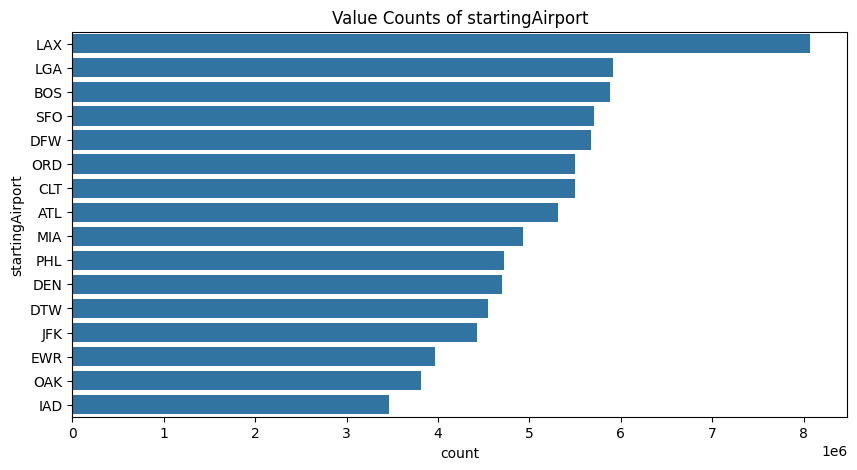

In [8]:
csv_file = "itineraries.csv"
col = "startingAirport"
df = pd.read_csv(csv_file, usecols=[col])

plt.figure(figsize=(10, 5))
sns.countplot(y=df[col], order=df[col].value_counts().index)
plt.title(f'Value Counts of {col}')
plt.show()

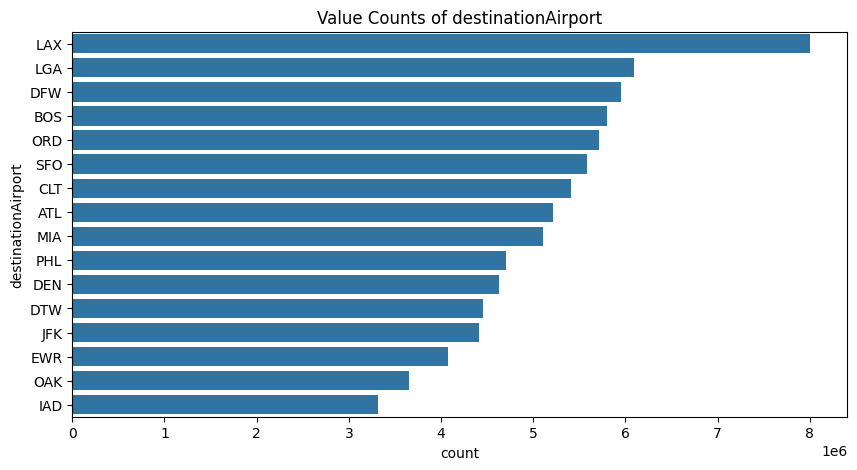

In [9]:
csv_file = "itineraries.csv"
col = "destinationAirport"
df = pd.read_csv(csv_file, usecols=[col])

plt.figure(figsize=(10, 5))
sns.countplot(y=df[col], order=df[col].value_counts().index)
plt.title(f'Value Counts of {col}')
plt.show()

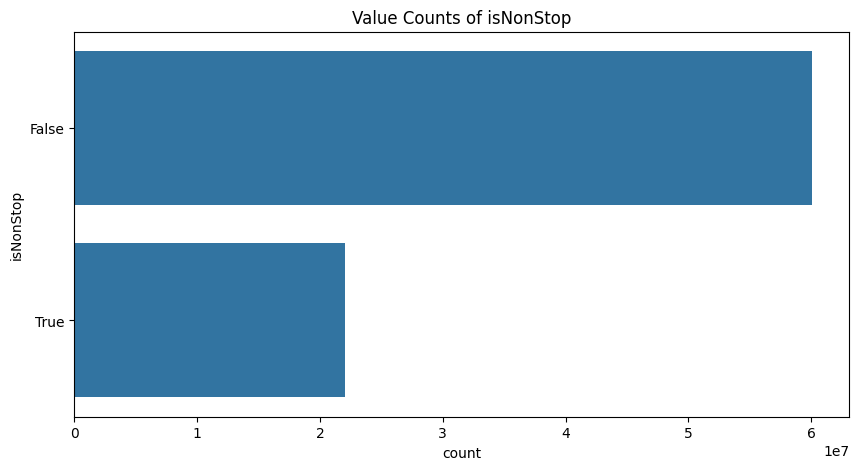

In [10]:
csv_file = "itineraries.csv"
col = "isNonStop"
df = pd.read_csv(csv_file, usecols=[col])

plt.figure(figsize=(10, 5))
sns.countplot(y=df[col], order=df[col].value_counts().index)
plt.title(f'Value Counts of {col}')
plt.show()

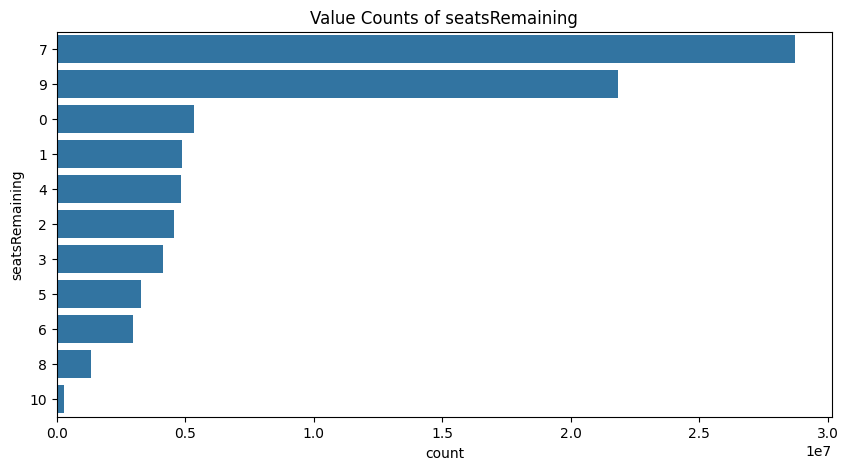

In [11]:
csv_file = "itineraries.csv"
col = "seatsRemaining"
df = pd.read_csv(csv_file, usecols=[col])

plt.figure(figsize=(10, 5))
sns.countplot(y=df[col], order=df[col].value_counts().index)
plt.title(f'Value Counts of {col}')
plt.show()

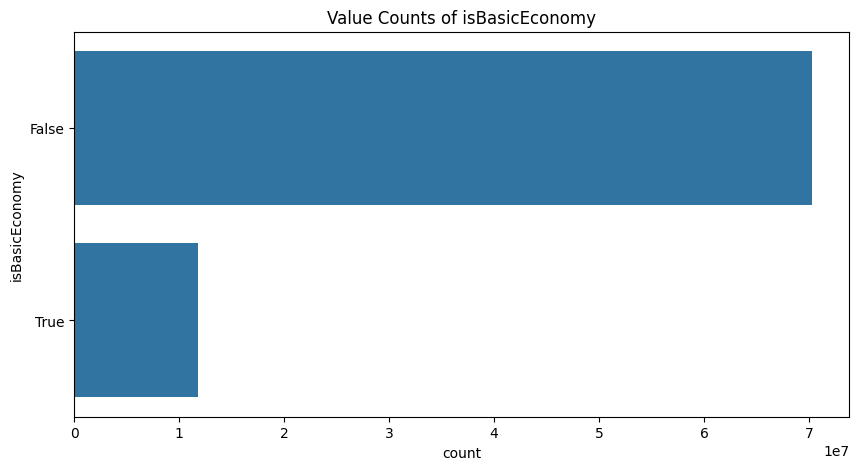

In [14]:
col = "isBasicEconomy"
df = pd.read_csv(csv_file, usecols=[col])

plt.figure(figsize=(10, 5))
sns.countplot(y=df[col], order=df[col].value_counts().index)
plt.title(f'Value Counts of {col}')
plt.show()

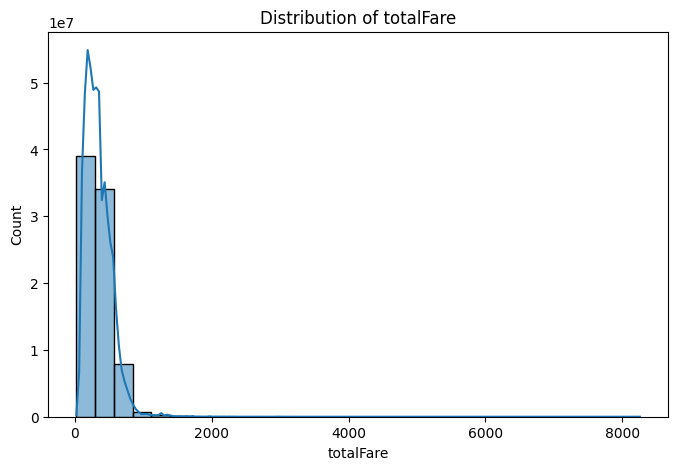

In [15]:
col = "totalFare"
df = pd.read_csv(csv_file, usecols=[col])

plt.figure(figsize=(8, 5))
sns.histplot(df[col], bins=30, kde=True)
plt.title(f'Distribution of {col}')
plt.show()

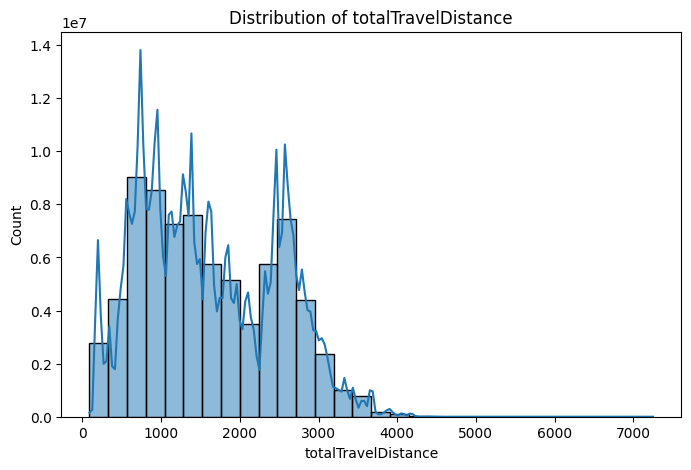

In [16]:
col = "totalTravelDistance"
df = pd.read_csv(csv_file, usecols=[col])

plt.figure(figsize=(8, 5))
sns.histplot(df[col], bins=30, kde=True)
plt.title(f'Distribution of {col}')
plt.show()

### Outlier Detection

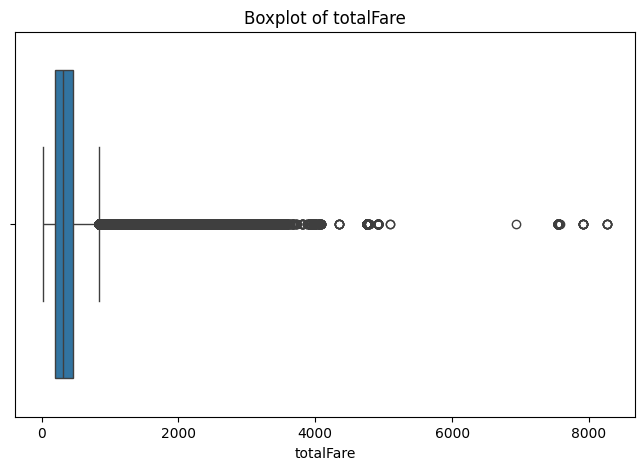

In [12]:
csv_file = "itineraries.csv"
col = "totalFare"
df = pd.read_csv(csv_file, usecols=[col])

plt.figure(figsize=(8, 5))
sns.boxplot(x=df[col])
plt.title(f'Boxplot of {col}')
plt.show()

---

## Data Visualization

### Average Ticket Prices by Starting Airport

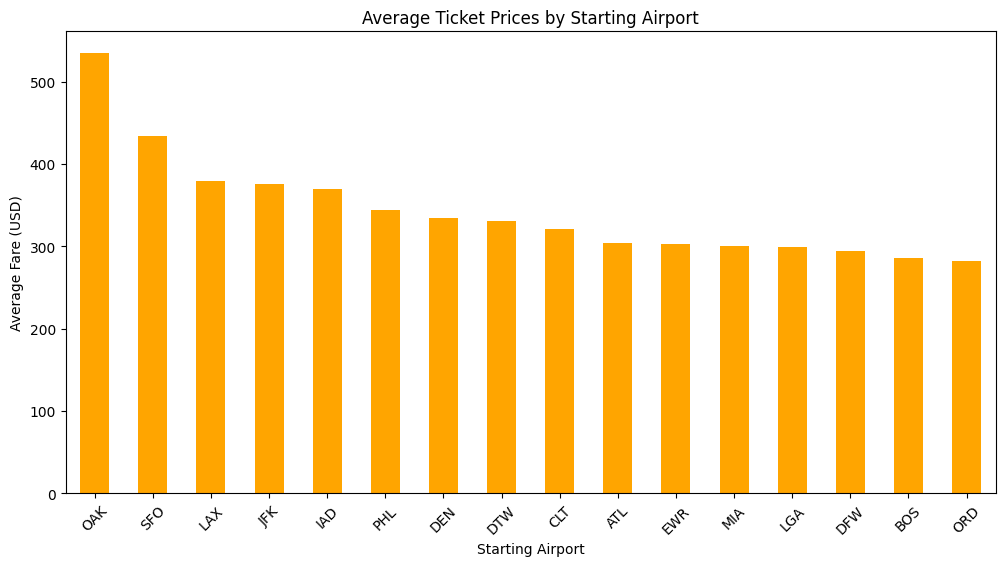

In [17]:
df = pd.read_csv(csv_file, usecols=["startingAirport", "totalFare"])
avg_prices = df.groupby("startingAirport")["totalFare"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_prices.plot(kind="bar", color="orange")
plt.xlabel("Starting Airport")
plt.ylabel("Average Fare (USD)")
plt.title("Average Ticket Prices by Starting Airport")
plt.xticks(rotation=45)
plt.show()

### Average Ticket Prices by Destination Airport

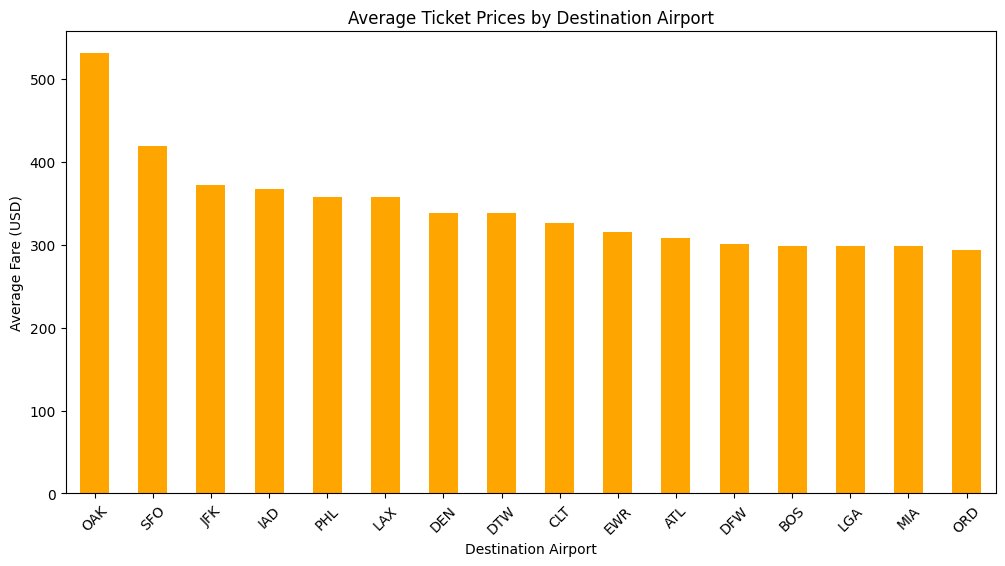

In [18]:
df = pd.read_csv(csv_file, usecols=["destinationAirport", "totalFare"])
avg_prices = df.groupby("destinationAirport")["totalFare"].mean().sort_values(ascending = False)

plt.figure(figsize=(12, 6))
avg_prices.plot(kind="bar", color="orange")
plt.xlabel("Destination Airport")
plt.ylabel("Average Fare (USD)")
plt.title("Average Ticket Prices by Destination Airport")
plt.xticks(rotation=45)
plt.show()

### Variation in Total Fare Based on 'isBasicEconomy'

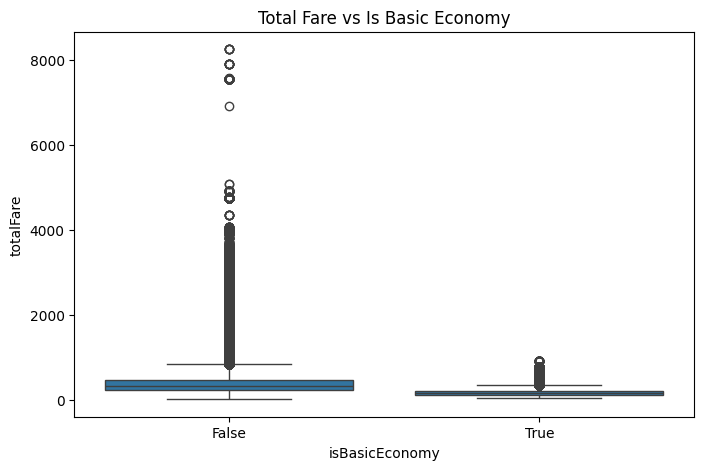

In [19]:
df = pd.read_csv(csv_file, usecols=["isBasicEconomy", "totalFare"])

# Boxplot to analyze how fare (totalFare) varies by isBasicEconomy
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['isBasicEconomy'], y=df['totalFare'])
plt.title('Total Fare vs Is Basic Economy')
plt.show()

### Average Ticket Prices by Date

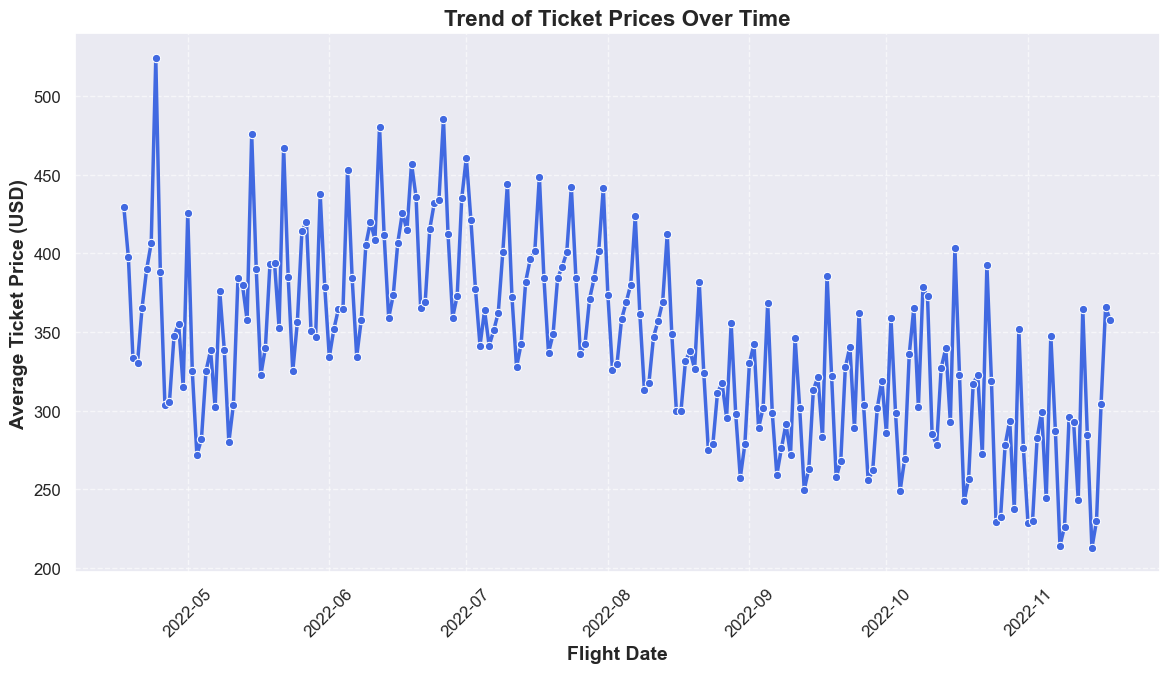

In [20]:
df = pd.read_csv(csv_file, usecols=["searchDate", "flightDate", "totalFare"])
df["searchDate"] = pd.to_datetime(df["searchDate"])
df["flightDate"] = pd.to_datetime(df["flightDate"])

avg_price_by_date = df.groupby("flightDate")["totalFare"].mean()

sns.set_theme(style="darkgrid")

plt.figure(figsize=(14, 7))
sns.lineplot(x=avg_price_by_date.index, y=avg_price_by_date.values, marker="o", color="royalblue", linewidth=2.5)

plt.xlabel("Flight Date", fontsize=14, fontweight="bold")
plt.ylabel("Average Ticket Price (USD)", fontsize=14, fontweight="bold")
plt.title("Trend of Ticket Prices Over Time", fontsize=16, fontweight="bold")

# Improve x-axis readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

### Correlation Heatmap

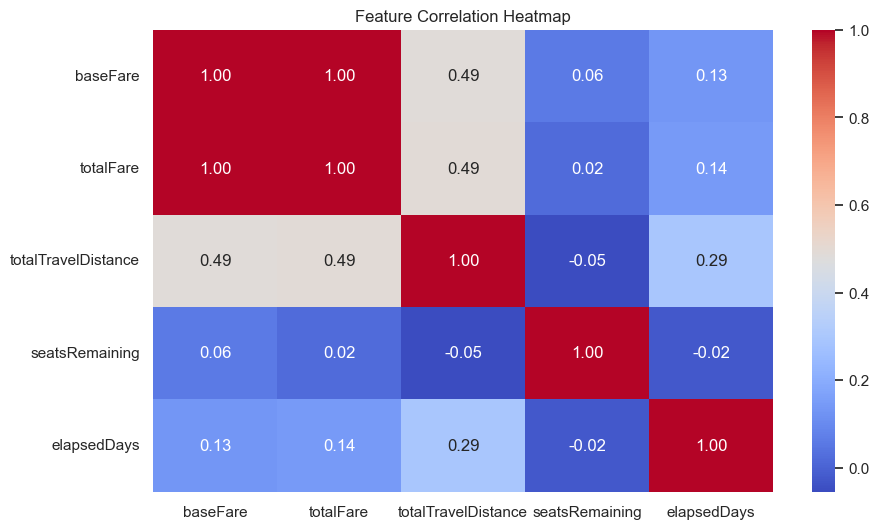

In [21]:
continuous_vars = ['baseFare', 'totalFare', 'totalTravelDistance', 'seatsRemaining', 'elapsedDays']
df = pd.read_csv(csv_file, usecols=continuous_vars)

plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous_vars].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

---

## Data Preprocessing

In [ ]:
import os
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import when, regexp_extract, coalesce, col, lit
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, MinMaxScaler
import holidays
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Set up & Load raw data
spark = SparkSession.builder.appName("FlightPreprocessing").getOrCreate()

df = spark.read.csv("./itineraries.csv", header=True, inferSchema=True)

In [ ]:
# Data cleaning & Feature engineering
columns_to_drop = [
    'legId', 'totalFare', 'elapsedDays', 'fareBasisCode',
    'segmentsAirlineCode', 'segmentsDepartureTimeEpochSeconds',
    'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalAirportCode',
    'segmentsDepartureAirportCode', 'segmentsEquipmentDescription', 'segmentsDistance'
]

df = df.drop(*columns_to_drop)

# isCoach
flight_clean = df.withColumn(
    'isCoach', F.when(F.col('segmentsCabinCode').contains('coach'), 1).otherwise(0)
).drop('segmentsCabinCode')

# days_until_flight
flight_clean = flight_clean.withColumn(
    'days_until_flight', F.datediff(F.to_date('flightDate'), F.to_date('searchDate'))
)

# holiday/weekend
us_holidays = holidays.US(years=2024)
holiday_dates = [d.strftime("%Y-%m-%d") for d in us_holidays]
flight_clean = flight_clean.withColumn("isHoliday", F.when(F.col("flightDate").isin(holiday_dates), 1).otherwise(0))
flight_clean = flight_clean.withColumn("isWeekend", F.when(F.dayofweek("flightDate").isin([1, 7]), 1).otherwise(0))

# Fill missing distance
flight_clean = flight_clean.withColumn(
    "totalTravelDistance",
    when(col("totalTravelDistance").rlike("^[0-9.]+$"), col("totalTravelDistance").cast("float"))
    .otherwise(None)
)
median_distance = flight_clean.approxQuantile("totalTravelDistance", [0.5], 0.01)[0]
flight_clean = flight_clean.fillna({"totalTravelDistance": median_distance})

# Extract travel minutes
flight_clean = flight_clean.withColumn(
    "hours",
    coalesce(regexp_extract(col("travelDuration"), r"(\d+)H", 1).cast("int"), lit(0))
).withColumn(
    "minutes",
    coalesce(regexp_extract(col("travelDuration"), r"(\d+)M", 1).cast("int"), lit(0))
)
flight_clean = flight_clean.withColumn(
    "travelMinutes",
    col("hours") * 60 + col("minutes")
)
flight_clean = flight_clean.drop('travelDuration')

# isNonstop
flight_clean = flight_clean.withColumn("segmentsDurationArray", F.split("segmentsDurationInSeconds", r"\\|\\|"))\
    .withColumn("isNonstop", F.when(F.size("segmentsDurationArray") == 1, 1).otherwise(0))\
    .drop("segmentsDurationArray", "segmentsDurationInSeconds")

In [ ]:
# Temporal sort
flight_clean = flight_clean.withColumn("departure_ts", F.to_timestamp("segmentsDepartureTimeRaw"))\
    .withColumn("departure_date", F.to_date("departure_ts"))\
    .orderBy("departure_date")

dates = flight_clean.select("departure_date").distinct().orderBy("departure_date")
total_dates = dates.count()
train_end_idx = int(total_dates * 0.7)
val_end_idx = train_end_idx + int(total_dates * 0.15)

train_dates = dates.limit(train_end_idx).collect()
val_dates = dates.limit(val_end_idx).tail(val_end_idx - train_end_idx)
test_dates = dates.tail(total_dates - val_end_idx)

train_cutoff = train_dates[-1]["departure_date"]
val_cutoff = val_dates[-1]["departure_date"]

train_df = flight_clean.filter(F.col("departure_date") <= train_cutoff)
val_df = flight_clean.filter((F.col("departure_date") > train_cutoff) & (F.col("departure_date") <= val_cutoff))
test_df = flight_clean.filter(F.col("departure_date") > val_cutoff)

In [ ]:
# Encoding pipeline
binary_cols = ["isBasicEconomy", "isRefundable", "isNonstop", "isCoach", "isWeekend", "isHoliday"]
for colname in binary_cols:
    train_df = train_df.withColumn(colname, F.col(colname).cast("int"))
    val_df = val_df.withColumn(colname, F.col(colname).cast("int"))
    test_df = test_df.withColumn(colname, F.col(colname).cast("int"))

categorical_cols = ["startingAirport", "destinationAirport", "segmentsAirlineName"]
numerical_cols = ["seatsRemaining", "totalTravelDistance", "travelMinutes"]

indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_vec") for col in categorical_cols]
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="num_features")
scaler = MinMaxScaler(inputCol="num_features", outputCol="scaled_num_features")

pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler])
pipeline_model = pipeline.fit(train_df)

In [ ]:
# Chunked transformation & Save
base_dir = os.getcwd()

os.makedirs(os.path.join(base_dir, "chunks", "train"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "chunks", "val"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "chunks", "test"), exist_ok=True)

train_output_path = os.path.join(base_dir, "chunks", "train")
val_output_path = os.path.join(base_dir, "chunks", "val")
test_output_path = os.path.join(base_dir, "chunks", "test")

In [ ]:
def transform_and_save_chunks(df, name_prefix, pipeline_model, chunk_size, output_dir):
    df = df.orderBy("departure_date")
    dates = df.select("departure_date").distinct().orderBy("departure_date")
    total_dates = dates.count()

    for start in range(0, total_dates, chunk_size):
        end = min(start + chunk_size, total_dates)
        date_range = dates.limit(end).tail(chunk_size)
        date_values = [row['departure_date'] for row in date_range]

        chunk_df = df.filter(F.col("departure_date").isin(date_values)).dropna(subset=["travelMinutes"])
        transformed = pipeline_model.transform(chunk_df)
        to_drop = [col + "_index" for col in categorical_cols] + ["num_features"]
        transformed = transformed.drop(*to_drop)

        output_path = os.path.join(output_dir, f"{name_prefix}_chunk_{start}_{end}.parquet")
        transformed.write.mode("overwrite").parquet(output_path)
        print(f"Saved: {output_path}")

In [ ]:
transform_and_save_chunks(train_df, "train", pipeline_model, chunk_size=50, output_dir=train_output_path)
transform_and_save_chunks(val_df, "val", pipeline_model, chunk_size=50, output_dir=val_output_path)
transform_and_save_chunks(test_df, "test", pipeline_model, chunk_size=50, output_dir=test_output_path)

25/04/14 23:24:21 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/04/14 23:24:22 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/04/14 23:24:23 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/04/14 23:40:22 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/04/14 23:40:30 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers


Saved: /Users/hpanh/24_25_school/Deep Learning/Final Project/chunks/train/train_chunk_0_50.parquet


25/04/15 00:00:06 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/04/15 00:00:27 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers


Saved: /Users/hpanh/24_25_school/Deep Learning/Final Project/chunks/train/train_chunk_50_100.parquet


25/04/15 00:08:53 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers


Saved: /Users/hpanh/24_25_school/Deep Learning/Final Project/chunks/train/train_chunk_100_150.parquet


25/04/15 00:13:51 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/04/15 00:13:58 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers


Saved: /Users/hpanh/24_25_school/Deep Learning/Final Project/chunks/train/train_chunk_150_152.parquet


25/04/15 00:20:17 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers


Saved: /Users/hpanh/24_25_school/Deep Learning/Final Project/chunks/val/val_chunk_0_32.parquet


25/04/15 00:26:18 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers


Saved: /Users/hpanh/24_25_school/Deep Learning/Final Project/chunks/test/test_chunk_0_34.parquet


In [ ]:
class ChunkedFlightGenerator(Sequence):
    def __init__(self, chunk_paths, batch_size=32, target_col="baseFare", vector_size=10):
        self.chunk_paths = chunk_paths
        self.batch_size = batch_size
        self.target_col = target_col
        self.vector_size = vector_size 

        # Load all data
        self.data = pd.concat([pd.read_parquet(path) for path in chunk_paths], ignore_index=True)

        # Extract 3 datetime-based features
        self.data = self._extract_datetime_features(self.data)

        # Drop raw string and datetime columns
        columns_to_drop = [
            'searchDate', 'flightDate', 'departure_ts',
            'startingAirport', 'destinationAirport',
            'segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw',
            'segmentsAirlineName', 'departure_date'
        ]
        self.data.drop(columns=[col for col in columns_to_drop if col in self.data.columns], inplace=True)

        # Vector columns to expand
        self.vec_columns = [
            'startingAirport_vec',
            'destinationAirport_vec',
            'segmentsAirlineName_vec',
            'scaled_num_features'
        ]
        vec_expansions = [self._expand_vector_column(col) for col in self.vec_columns if col in self.data.columns]
        self.data.drop(columns=self.vec_columns, inplace=True, errors='ignore')

        # Numeric features (excluding target)
        numeric_df = self.data.drop(columns=[self.target_col])
        final_df = pd.concat([numeric_df] + vec_expansions, axis=1)

        # Final features and targets
        self.X = final_df.astype(np.float32).values
        self.y = self.data[self.target_col].astype(np.float32).values

    def _expand_vector_column(self, col_name):
        """Expands a column of lists/vectors into multiple float32 columns."""
        # Fill NaNs with empty lists to avoid errors
        self.data[col_name] = self.data[col_name].apply(lambda x: x if isinstance(x, (list, np.ndarray)) else [])

        # Expand each vector into a fixed-length list
        expanded = self.data[col_name].apply(self._pad_or_truncate)

        # Convert to DataFrame
        expanded_df = pd.DataFrame(expanded.tolist(), index=self.data.index)

        # Rename columns
        expanded_df.columns = [f"{col_name}_{i}" for i in range(expanded_df.shape[1])]
        return expanded_df.astype(np.float32)

    def _pad_or_truncate(self, vector):
        """Pads or truncates a list-like vector to self.vector_size."""
        if isinstance(vector, pd.Series) or isinstance(vector, np.ndarray):
            vector = list(vector)
        elif not isinstance(vector, list):
            return [0.0] * self.vector_size

        if len(vector) > self.vector_size:
            return vector[:self.vector_size]
        else:
            return vector + [0.0] * (self.vector_size - len(vector))

    def _extract_datetime_features(self, df):
        """Extracts specific datetime-derived features."""
        if 'searchDate' in df.columns:
            df['searchDate'] = pd.to_datetime(df['searchDate'], errors='coerce')
            df['searchDate_dayofweek'] = df['searchDate'].dt.dayofweek

        if 'flightDate' in df.columns:
            df['flightDate'] = pd.to_datetime(df['flightDate'], errors='coerce')
            df['flightDate_month'] = df['flightDate'].dt.month

        if 'departure_ts' in df.columns:
            df['departure_ts'] = pd.to_datetime(df['departure_ts'], errors='coerce')
            df['departure_ts_hour'] = df['departure_ts'].dt.hour

        return df

    def __len__(self):
        return int(np.ceil(len(self.X) / self.batch_size))

    def __getitem__(self, idx):
        batch_x = self.X[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x[:, np.newaxis, :], batch_y  # Shape: (batch_size, 1, features)


## Baseline 1: ARIMA

## Baseline 2: XGBoost

## Simple RNN

In [ ]:
# Prepare data
base_dir = os.getcwd()
train_chunk_dir = os.path.join(base_dir, "chunks", "train")
val_chunk_dir = os.path.join(base_dir, "chunks", "val")
test_chunk_dir = os.path.join(base_dir, "chunks", "test")

train_chunks = sorted([
    os.path.join(train_chunk_dir, f) for f in os.listdir(train_chunk_dir) if f.endswith(".parquet")
])
val_chunks = sorted([
    os.path.join(val_chunk_dir, f) for f in os.listdir(val_chunk_dir) if f.endswith(".parquet")
])
test_chunks = sorted([
    os.path.join(test_chunk_dir, f) for f in os.listdir(test_chunk_dir) if f.endswith(".parquet")
])

train_gen = ChunkedFlightGenerator(train_chunks)
val_gen = ChunkedFlightGenerator(val_chunks)
test_gen = ChunkedFlightGenerator(test_chunks)  

In [ ]:
model = Sequential([
    SimpleRNN(16, input_shape=(1, train_gen.X.shape[1])), 
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(train_gen, validation_data=val_gen, epochs=5)

predictions = model.predict(test_gen, batch_size=128)
y_true = np.concatenate(
    [test_gen[i][1] for i in range(len(test_gen))],
    axis=0
)

print(f"Test MSE: {mean_squared_error(y_true, predictions):.4f}")
print(f"Test MAE: {mean_absolute_error(y_true, predictions):.4f}")
print(f"Test R²: {r2_score(y_true, predictions):.4f}")

Epoch 1/5


/Users/hpanh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/hpanh/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


742753/742753 ━━━━━━━━━━━━━━━━━━━━ 668s 898us/step - loss: 26025.8164 - val_loss: 14851.0352
Epoch 2/5
742753/742753 ━━━━━━━━━━━━━━━━━━━━ 650s 875us/step - loss: 18830.6934 - val_loss: 14194.5537
Epoch 3/5
742753/742753 ━━━━━━━━━━━━━━━━━━━━ 665s 894us/step - loss: 17291.7559 - val_loss: 13641.6836
Epoch 4/5
742753/742753 ━━━━━━━━━━━━━━━━━━━━ 661s 890us/step - loss: 17177.0996 - val_loss: 13826.0449
Epoch 5/5
742753/742753 ━━━━━━━━━━━━━━━━━━━━ 763s 1ms/step - loss: 16935.3184 - val_loss: 13769.9219
49114/49114 ━━━━━━━━━━━━━━━━━━━━ 33s 669us/step
Test MSE: 11205.9932
Test MAE: 83.0002
Test R²: -0.1239


## LSTM

## GRU